In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sales_processing import fill_in_dates
from pandas.plotting import lag_plot

In [113]:
sales = pd.read_csv('data/caspecoTrainingData.csv')

dates = pd.date_range('2020-01-01', '2023-01-04')

sales = fill_in_dates(sales, dates)

#divide sales into Company
sales_company_1 = sales[sales['Company'] == 0]
sales_company_2 = sales[sales['Company'] == 1]
sales_company_3 = sales[sales['Company'] == 2]

sales_company_1.index = pd.DatetimeIndex(sales_company_1['Date'], freq='D')
sales_company_2.index = pd.DatetimeIndex(sales_company_2['Date'], freq='D')
sales_company_3.index = pd.DatetimeIndex(sales_company_3['Date'], freq='D')

sales_company_1 = sales_company_1.drop(columns=['Company', 'Date'])
sales_company_2 = sales_company_2.drop(columns=['Company', 'Date'])
sales_company_3 = sales_company_3.drop(columns=['Company', 'Date'])



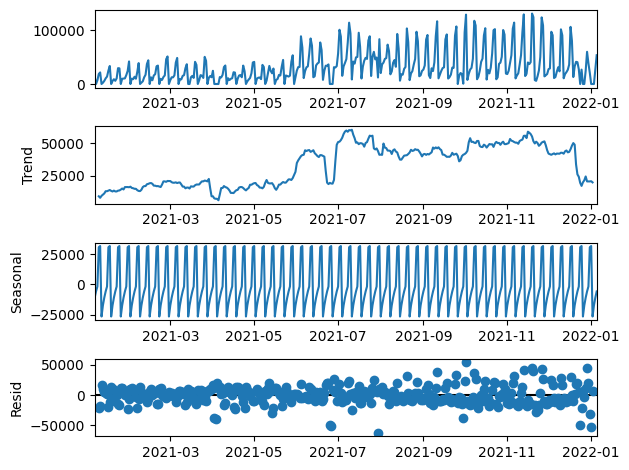

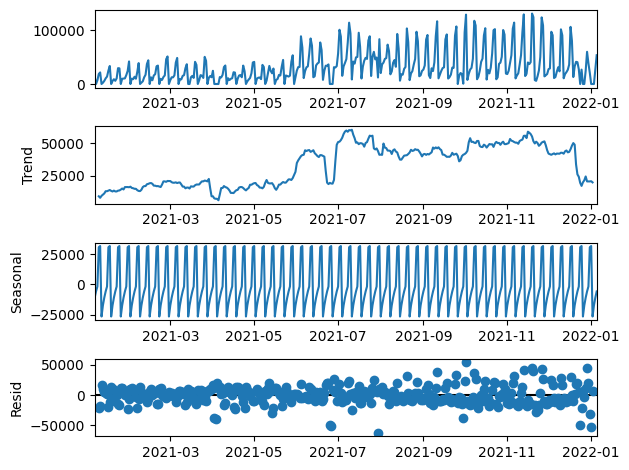

In [114]:
## CODE FROM https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data_c1 = seasonal_decompose(sales_company_1['2021-01-05':'2022-01-05'], model="additive")
decompose_data_c1.plot()


<AxesSubplot: xlabel='Date'>

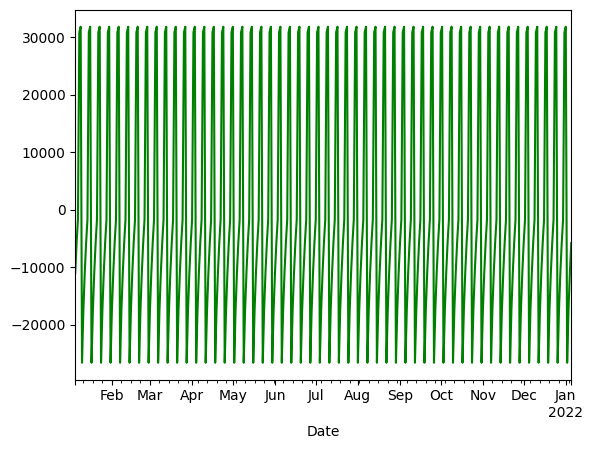

In [115]:

seasonality=decompose_data_c1.seasonal
seasonality.plot(color='green')

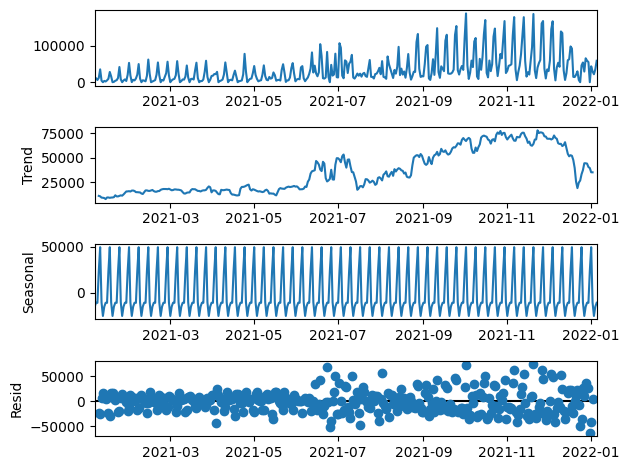

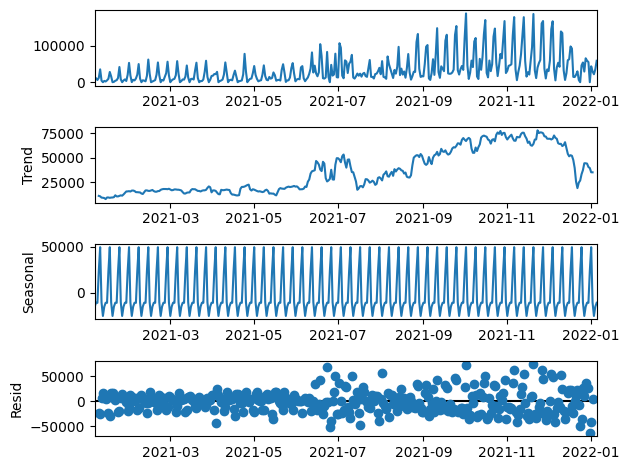

In [116]:

decompose_data_c2 = seasonal_decompose(sales_company_2['2021-01-05':'2022-01-05'], model="additive")
decompose_data_c2.plot()


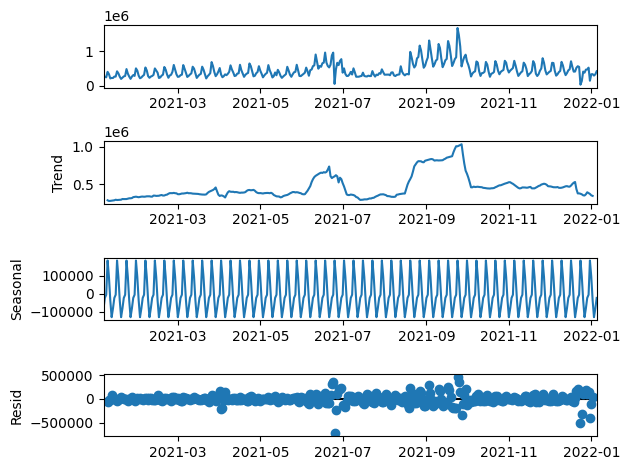

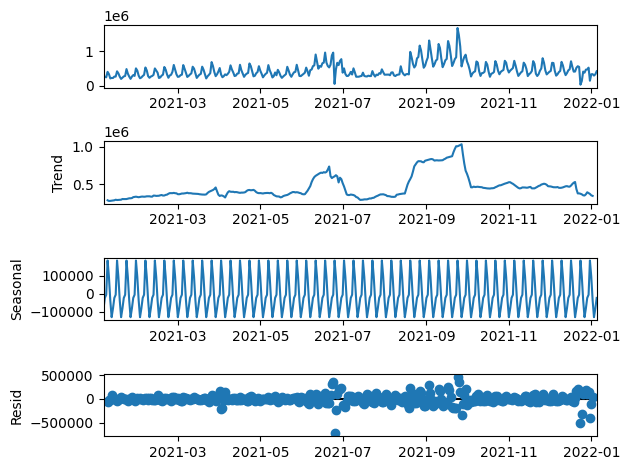

In [117]:

decompose_data_c3 = seasonal_decompose(sales_company_3['2021-01-05':'2022-01-05'], model="additive")
decompose_data_c3.plot()



In [118]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_company_2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.3920546992187393
2. P-Value :  0.14399148007595258
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1078
5. Critical Values :
	 1% :  -3.4364306491488814
	 5% :  -2.8642248442477976
	 10% :  -2.5681995044075987


<AxesSubplot: title={'center': 'original'}, xlabel='Date'>

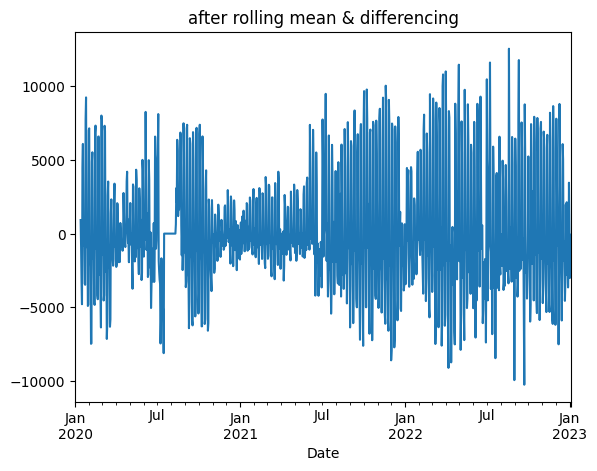

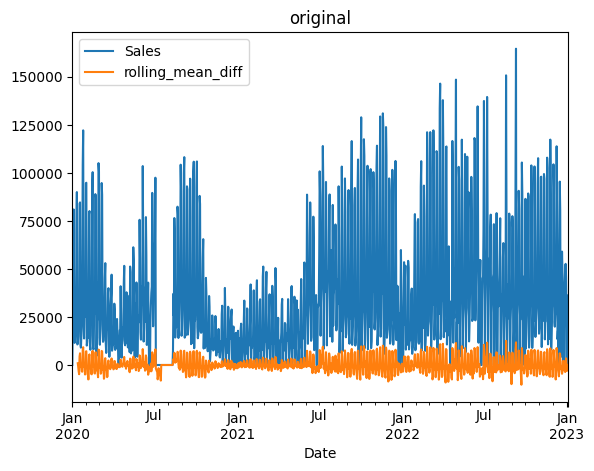

In [119]:
rolling_mean = sales_company_1.rolling(window = 12).mean()
sales_company_1['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
sales_company_1['rolling_mean_diff'].plot(title='after rolling mean & differencing')
ax2 = plt.subplot()
sales_company_1.plot(title='original')

In [120]:
dftest = adfuller(sales_company_1['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -6.417404936456145
2. P-Value :  1.8267796476736192e-08
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1065
5. Critical Values :
	 1% :  -3.4365050530846846
	 5% :  -2.864257662806096
	 10% :  -2.568216983623179


C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='Date'>

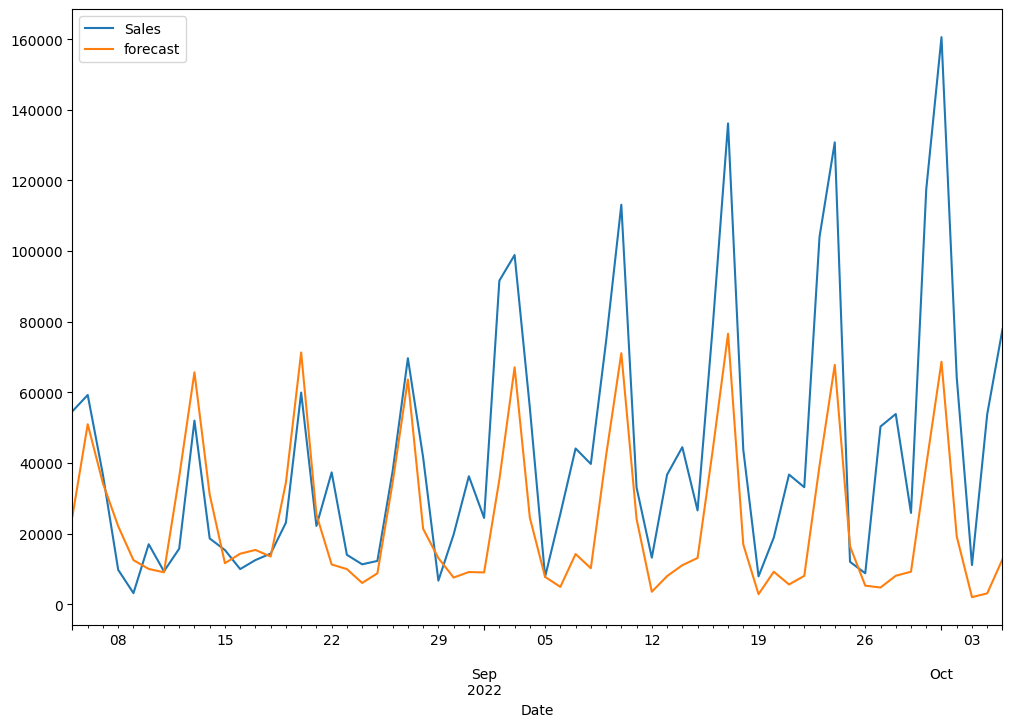

In [123]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(sales_company_2['Sales'],order=(21, 1, 8),seasonal_order=(1,1,1,28))
results=model.fit()
start = pd.to_datetime('2022-08-05')
end = pd.to_datetime('2022-10-05')
sales_company_2['forecast']=results.predict(start=start,end=end,dynamic=True)
sales_company_2[['Sales','forecast']][start:end].plot(figsize=(12,8))
